# Explore U.S. Births

## Introduction To The Dataset

In [1]:
csv_list = open("US_births_1994-2003_CDC_NCHS.csv").read().split("\r")

In [2]:
csv_list[0:10]

['year,month,date_of_month,day_of_week,births',
 '1994,1,1,6,8096',
 '1994,1,2,7,7772',
 '1994,1,3,1,10142',
 '1994,1,4,2,11248',
 '1994,1,5,3,11053',
 '1994,1,6,4,11406',
 '1994,1,7,5,11251',
 '1994,1,8,6,8653',
 '1994,1,9,7,7910']

## Converting Data Into A List Of Lists

In [3]:
def read_csv(filename):
    string_data = open(filename).read()
    string_list = string_data.split("\r")[1:]
    final_list = []
    
    for row in string_list:
        string_fields = row.split(",")
        int_fields = []
        for value in string_fields:
            int_fields.append(int(value))
        final_list.append(int_fields)
    return final_list
cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")

In [4]:
type(cdc_list), type(cdc_list[1]), type(cdc_list[1][1])

(list, list, int)

## Calculating Number Of Births Each Month

In [5]:
def month_births(list_of_list):
    births_per_month = {}
    for value in list_of_list:
        month = value[1]
        births = value[4]
        if month in births_per_month:
            births_per_month[month] = births_per_month[month] + births
        else:
            births_per_month[month] = births
    return births_per_month
cdc_month_births = month_births(cdc_list)

In [6]:
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

## Calculating Number Of Births Each Day Of Week

In [7]:
def dow_births(list_of_lists):
    births_by_day = {}
    for value in list_of_lists:
        dow = value[3]
        births = value[4]
        if dow in births_by_day:
            births_by_day[dow] = births_by_day[dow] + births
        else:
            births_by_day[dow] = births
    return births_by_day
cdc_day_births = dow_births(cdc_list)

In [8]:
cdc_day_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

## Creating A More General Function

In [9]:
def calc_counts(list_of_lists, numb_column):
    cdc_births = {}
    for value in list_of_lists:
        column = value[numb_column]
        births = value[4]
        if column in cdc_births:
            cdc_births[column] = cdc_births[column] + births
        else:
            cdc_births[column] = births
    return cdc_births

cdc_year_births = calc_counts(cdc_list,0)
cdc_month_births = calc_counts(cdc_list,1)
cdc_dom_births = calc_counts(cdc_list,2)
cdc_dow_births = calc_counts(cdc_list,3)


In [10]:
cdc_year_births

{1994: 3952767,
 1995: 3899589,
 1996: 3891494,
 1997: 3880894,
 1998: 3941553,
 1999: 3959417,
 2000: 4058814,
 2001: 4025933,
 2002: 4021726,
 2003: 4089950}

In [11]:
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [12]:
cdc_dom_births

{1: 1276557,
 2: 1288739,
 3: 1304499,
 4: 1288154,
 5: 1299953,
 6: 1304474,
 7: 1310459,
 8: 1312297,
 9: 1303292,
 10: 1320764,
 11: 1314361,
 12: 1318437,
 13: 1277684,
 14: 1320153,
 15: 1319171,
 16: 1315192,
 17: 1324953,
 18: 1326855,
 19: 1318727,
 20: 1324821,
 21: 1322897,
 22: 1317381,
 23: 1293290,
 24: 1288083,
 25: 1272116,
 26: 1284796,
 27: 1294395,
 28: 1307685,
 29: 1223161,
 30: 1202095,
 31: 746696}

In [13]:
cdc_dow_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

In [14]:
cdc_year_births[2003]

4089950

## Function that can calculate the min and max values of any dictionary

In [15]:
def min_max(new_dic, typ):
    max_count= {}
    max_count[max(new_dic)] = new_dic[max(new_dic)]
    min_count= {}
    min_count[min(new_dic)] = new_dic[min(new_dic)]
    if typ == "max":
        return max_count
    elif typ == "min":
        return min_count
    elif typ == "both":
        return (min_count,max_count)
    else:
        print ("please enter 'max' or 'min' or 'both' as argument")
min_year = min_max(cdc_year_births, "min")
max_year = min_max(cdc_year_births, "max")
both_year= min_max(cdc_year_births, "both")

    

In [16]:
min_year

{1994: 3952767}

In [17]:
max_year

{2003: 4089950}

In [18]:
both_year

({1994: 3952767}, {2003: 4089950})

## Caculate difference of births between two years for similar day of the week

In [19]:
def difference_day_of_week(list_of_lists, day_week, year1, year2):
    births_year1 = {}
    births_year2 = {}
    births_by_day = {}
    for value in list_of_lists:
        byear = value[0]
        dow = value[3]
        births = value[4]
        if byear == year1 and dow == day_week:
            if dow in births_by_day:
                births_year1[dow] = births_year1[dow] + births
            else:
                births_year1[dow] = births
        if byear == year2 and dow == day_week:
            if dow in births_by_day:
                births_year2[dow] = births_year2[dow] + births
            else:
                births_year2[dow] = births
    difference = births_year2[day_week]-births_year1[day_week]
    return difference
            
difference_list =[]
a = 1994
b = 2003
for i in range(1,8):
    difference_dow = difference_day_of_week(cdc_list,i,a,b)
    difference_list.append(difference_dow)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

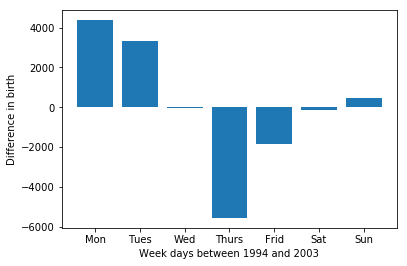

In [21]:
plt.bar(range(1,8), difference_list )
plt.xticks(range(1,8), ['Mon','Tues','Wed','Thurs','Frid','Sat', 'Sun'])
plt.ylabel('Difference in birth')
plt.xlabel('Week days between '+str(a)+' and '+str(b))